In [1]:
import numpy as np
from numpy.linalg import det, inv
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

from anneling_one import Annealing1

In [2]:
a1 = [1,0]; a2=[0,1];
A  = np.transpose([a1,a2]);

theta =  np.pi/4;
R = [ [ np.cos(theta), -np.sin(theta)], [ np.sin(theta),  np.cos(theta)] ];

b1 = np.sqrt(2)*np.dot(R,a1);  b2 = np.sqrt(2)*np.dot(R,a2); #a2
B  = np.transpose([b1,b2]);

a = A#np.array([[0,1],[1,0]])
b = B#np.array([[0,5],[5,0]])

In [3]:
# a = np.array([[0,1],[1,0]])
# b = np.sqrt(2)*np.array([[0,5],[5,0]])
eps = 0.0001

bond=10

def tAtB(params):
    tA = np.array([[params[0],params[1]],
                   [params[2],params[3]]])
    
    tB = np.dot(np.dot(tA,a), inv(b)) # tAa=tBb
    
    return tA, tB
          
def fit_fucntion(params , k_p=999):
          
        tA, tB= tAtB(params)
        tAa= np.dot(tA,a)
        tBb= np.dot(tB,b)
        
        # main condition
        zero_mat= tAa - tBb
        s=0
        for row in zero_mat:
            for e in row:
                s+=e*e
        
        # mimimum TA
        detTAa= det(tAa)*det(tAa) # minimum but biger than 0
        detTBb= det(tBb)*det(tBb)
        
        # TB integer 
        cons =9999999
        tB_con = 0  
        for row in tB:
            for e in row:
                tB_con += ((round(e)-e))*((round(e)-e)) # e*e
        tB_con = tB_con*cons
        
        
        f =  (1/detTAa)**(1/10)+ tB_con**2 + (det(tA)*det(tA))**4
        #((1-detTAa)**2)*k_p + tB_con**2
        
        
        return f 

In [4]:
# Experiment settings

#Hyperparameters of the model
model_par = {
    
    'initialTemp': 4, 
    'finalTemp': 0.0003,

    'beta': 10,
    'bounds': [[-2*bond,2*bond] for _ in range(4)],

    'nr_neighbours': 1,
    'step_size': 4,
    'gaussian_sd':3,
    
    'known_min': 0
    
}



#
input_size = 4 # since our function has one variable this is a trivial scenario.
start_point = [1,0,0,1]

# Experiment
experiment = Annealing1(fit_fucntion ,start_point, model_par)

In [5]:
epochs= 40
history_book = experiment.evolve( epochs, prints_p=5)

temp:4|epoch:0|change:-74995690032706.19|value:25004289967296.777
temp:4|epoch:5|change:25499999999.91797|value:25000095000000.79
temp:4|epoch:10|change:-98320383.93359375|value:24999996679616.855
temp:4|epoch:15|change:1.0849219259142328e+16|value:4347792138496.4775
temp:4|epoch:20|change:97301526357439.6|value:429981696.608366
temp:4|epoch:25|change:25002127908929.13|value:429981696.608366
temp:4|epoch:30|change:64062065018304.01|value:429981696.608366
temp:4|epoch:35|change:25016548581345.1|value:429981696.608366
temp:0.0975609756097561|epoch:0|change:3961588370720379.5|value:429981696.608366
temp:0.0975609756097561|epoch:5|change:1.3138403148021793e+18|value:429981696.608366
temp:0.0975609756097561|epoch:10|change:7.311866993618598e+17|value:429981696.608366
temp:0.0975609756097561|epoch:15|change:460040156287998.6|value:429981696.608366
temp:0.0975609756097561|epoch:20|change:-428302079.90953887|value:1679616.6988271188
temp:0.0975609756097561|epoch:25|change:8.392742123470154e+18

/var/folders/3_/hxxz6cjj6k92q_tqrvht1tf80000gn/T/ipykernel_77420/549596183.py:41: RuntimeWarning: divide by zero encountered in double_scalars
  f =  (1/detTAa)**(1/10)+ tB_con**2 + (det(tA)*det(tA))**4


temp:0.04938271604938272|epoch:25|change:431067672556383.3|value:256.8705505632941
temp:0.04938271604938272|epoch:30|change:14048223624959.637|value:256.8705505632941
temp:0.04938271604938272|epoch:35|change:99999743.76040696|value:256.8705505632941
temp:0.03305785123966942|epoch:0|change:25110070313919.734|value:256.8705505632941
temp:0.03305785123966942|epoch:5|change:27821104907199.69|value:256.8705505632941
temp:0.03305785123966942|epoch:10|change:6734204292890369.0|value:256.8705505632941
temp:0.03305785123966942|epoch:15|change:4727525271151252.0|value:256.8705505632941
temp:0.03305785123966942|epoch:20|change:670753526245504.6|value:256.8705505632941
temp:0.03305785123966942|epoch:25|change:7.67112820163403e+16|value:256.8705505632941
temp:0.03305785123966942|epoch:30|change:1395114365682879.8|value:256.8705505632941
temp:0.03305785123966942|epoch:35|change:1.1034903768289054e+17|value:256.8705505632941
temp:0.02484472049689441|epoch:0|change:1.7488412454588243e+17|value:256.870

temp:0.0062402496099844005|epoch:5|change:36688195277344.76|value:256.8705505632975
temp:0.0062402496099844005|epoch:10|change:45047607231679.67|value:256.8705505632975
temp:0.0062402496099844005|epoch:15|change:2.478463175794777e+16|value:256.8705505632975
temp:0.0062402496099844005|epoch:20|change:25000424981439.895|value:256.8705505632975
temp:0.0062402496099844005|epoch:25|change:1777721579999739.2|value:256.8705505632975
temp:0.0062402496099844005|epoch:30|change:110075313919.65881|value:256.8705505632975
temp:0.0062402496099844005|epoch:35|change:2.8525864220671856e+16|value:256.8705505632975
temp:0.005873715124816448|epoch:0|change:4.5974729858572e+16|value:256.8705505632975
temp:0.005873715124816448|epoch:5|change:1679359.8282765914|value:256.8705505632975
temp:0.005873715124816448|epoch:10|change:216707307997024.9|value:256.8705505632975
temp:0.005873715124816448|epoch:15|change:29347787138239.59|value:256.8705505632975
temp:0.005873715124816448|epoch:20|change:8.3927421234718

temp:0.0034453057708871667|epoch:20|change:105351989260224.92|value:256.87055056329615
temp:0.0034453057708871667|epoch:25|change:1878020183851590.0|value:256.87055056329615
temp:0.0034453057708871667|epoch:30|change:100016963562785.17|value:256.87055056329615
temp:0.0034453057708871667|epoch:35|change:100078290985025.39|value:256.87055056329615
temp:0.0033305578684429643|epoch:0|change:120047592231680.33|value:256.87055056329615
temp:0.0033305578684429643|epoch:5|change:291707292997025.4|value:256.87055056329615
temp:0.0033305578684429643|epoch:10|change:100500226412705.0|value:256.87055056329615
temp:0.0033305578684429643|epoch:15|change:613798354428385.9|value:256.87055056329615
temp:0.0033305578684429643|epoch:20|change:27251870390368.773|value:256.87055056329615
temp:0.0033305578684429643|epoch:25|change:1.954337550578901e+17|value:256.87055056329615
temp:0.0033305578684429643|epoch:30|change:3.513953275301566e+16|value:256.87055056329615
temp:0.0033305578684429643|epoch:35|change

temp:0.0023242300987797795|epoch:0|change:30352004260224.758|value:256.87055056329615
temp:0.0023242300987797795|epoch:5|change:429981439.7378138|value:256.87055056329615
temp:0.0023242300987797795|epoch:10|change:7.65997893392857e+17|value:256.87055056329615
temp:0.0023242300987797795|epoch:15|change:114048203624960.38|value:256.87055056329615
temp:0.0023242300987797795|epoch:20|change:106553579999743.73|value:256.87055056329615
temp:0.0023242300987797795|epoch:25|change:208827064319.65094|value:256.87055056329615
temp:0.0023242300987797795|epoch:30|change:670753526245500.5|value:256.87055056329615
temp:0.0023242300987797795|epoch:35|change:5157188726375363.0|value:256.87055056329615
temp:0.0022714366837024423|epoch:0|change:100010999960320.31|value:256.87055056329615
temp:0.0022714366837024423|epoch:5|change:1.1020960575799997e+18|value:256.87055056329615
temp:0.0022714366837024423|epoch:10|change:306474971710398.94|value:256.87055056329615
temp:0.0022714366837024423|epoch:15|change:

temp:0.0017849174475680506|epoch:30|change:3.5035367690374953e+18|value:256.8705505633007
temp:0.0017849174475680506|epoch:35|change:99999981679360.12|value:256.8705505633007
temp:0.0017536168347216138|epoch:0|change:100656079999744.25|value:256.8705505633007
temp:0.0017536168347216138|epoch:5|change:31553594999743.78|value:256.8705505633007
temp:0.0017536168347216138|epoch:10|change:172301941338880.3|value:256.8705505633007
temp:0.0017536168347216138|epoch:15|change:27251870390368.78|value:256.8705505633007
temp:0.0017536168347216138|epoch:20|change:25000424981439.895|value:256.8705505633007
temp:0.0017536168347216138|epoch:25|change:25500241412704.535|value:256.8705505633007
temp:0.0017536168347216138|epoch:30|change:1.002499999499978e+16|value:256.8705505633007
temp:0.0017536168347216138|epoch:35|change:128179260428800.08|value:256.8705505633007
temp:0.0017233950883239987|epoch:0|change:109682631996160.31|value:256.8705505633007
temp:0.0017233950883239987|epoch:5|change:343644807890

temp:0.0014280614066404858|epoch:15|change:25000810730464.93|value:256.870550563295
temp:0.0014280614066404858|epoch:20|change:100004274967040.4|value:256.870550563295
temp:0.0014280614066404858|epoch:25|change:24999996679360.03|value:256.870550563295
temp:0.0014280614066404858|epoch:30|change:601480094999745.5|value:256.870550563295
temp:0.0014280614066404858|epoch:35|change:538798369428385.5|value:256.870550563295
temp:0.001407954945441746|epoch:0|change:100000194358625.48|value:256.870550563295
temp:0.001407954945441746|epoch:5|change:2503758906082235.5|value:256.870550563295
temp:0.001407954945441746|epoch:10|change:48811281661504.65|value:256.870550563295
temp:0.001407954945441746|epoch:15|change:360040606269438.4|value:256.870550563295
temp:0.001407954945441746|epoch:20|change:100000023046465.5|value:256.870550563295
temp:0.001407954945441746|epoch:25|change:70767939570144.89|value:256.870550563295
temp:0.001407954945441746|epoch:30|change:196717291573759.75|value:256.87055056329

temp:0.001190121987503719|epoch:0|change:3307116710436864.5|value:256.87055056328865
temp:0.001190121987503719|epoch:5|change:381474956710399.4|value:256.87055056328865
temp:0.001190121987503719|epoch:10|change:5.9704644755390536e+16|value:256.87055056328865
temp:0.001190121987503719|epoch:15|change:906460071893823.9|value:256.87055056328865
temp:0.001190121987503719|epoch:20|change:1260736286547426.2|value:256.87055056328865
temp:0.001190121987503719|epoch:25|change:4727525271151253.0|value:256.87055056328865
temp:0.001190121987503719|epoch:30|change:87259685411105.02|value:256.87055056328865
temp:0.001190121987503719|epoch:35|change:1878020183851576.5|value:256.87055056328865
temp:0.0011761246692149365|epoch:0|change:1.476789055799993e+17|value:256.87055056328865
temp:0.0011761246692149365|epoch:5|change:87259685411104.62|value:256.87055056328865
temp:0.0011761246692149365|epoch:10|change:2.0025626396901628e+16|value:256.87055056328865
temp:0.0011761246692149365|epoch:15|change:96826

temp:0.0010306622004637976|epoch:20|change:4329672094999743.5|value:256.87055056328865
temp:0.0010306622004637976|epoch:25|change:27251870390368.69|value:256.87055056328865
temp:0.0010306622004637976|epoch:30|change:4.6049729843572e+16|value:256.87055056328865
temp:0.0010306622004637976|epoch:35|change:601480094999745.4|value:256.87055056328865
temp:0.0010201479214486096|epoch:0|change:25208822064319.86|value:256.87055056328865
temp:0.0010201479214486096|epoch:5|change:24999996679360.01|value:256.87055056328865
temp:0.0010201479214486096|epoch:10|change:100110055313920.25|value:256.87055056328865
temp:0.0010201479214486096|epoch:15|change:211429137111745.06|value:256.87055056328865
temp:0.0010201479214486096|epoch:20|change:39062499999743.54|value:256.87055056328865
temp:0.0010201479214486096|epoch:25|change:99999985764545.5|value:256.87055056328865
temp:0.0010201479214486096|epoch:30|change:100002542890369.48|value:256.87055056328865
temp:0.0010201479214486096|epoch:35|change:45716323

temp:0.000908884344467166|epoch:35|change:106553579999744.1|value:256.87055056329615
temp:0.0009006980409817604|epoch:0|change:53459728531199.48|value:256.87055056329615
temp:0.0009006980409817604|epoch:5|change:inf|value:256.87055056329615
temp:0.0009006980409817604|epoch:10|change:25025594999743.836|value:256.87055056329615
temp:0.0009006980409817604|epoch:15|change:381474956710401.2|value:256.87055056329615
temp:0.0009006980409817604|epoch:20|change:70767939570144.81|value:256.87055056329615
temp:0.0009006980409817604|epoch:25|change:36688195277344.76|value:256.87055056329615
temp:0.0009006980409817604|epoch:30|change:31553594999743.7|value:256.87055056329615
temp:0.0009006980409817604|epoch:35|change:25001470788799.793|value:256.87055056329615
temp:0.0008926578888640924|epoch:0|change:5132188731375363.0|value:256.87055056329615
temp:0.0008926578888640924|epoch:5|change:171830432604064.94|value:256.87055056329615
temp:0.0008926578888640924|epoch:10|change:2.0063830001605048e+18|valu

temp:0.0008062890546260829|epoch:35|change:100282409536225.38|value:256.87055056329615
temp:0.0007998400319936008|epoch:0|change:99999980065280.19|value:256.87055056329615
temp:0.0007998400319936008|epoch:5|change:24999995065280.008|value:256.87055056329615
temp:0.0007998400319936008|epoch:10|change:25110070313919.78|value:256.87055056329615
temp:0.0007998400319936008|epoch:15|change:211429137111745.3|value:256.87055056329615
temp:0.0007998400319936008|epoch:20|change:25656094999743.707|value:256.87055056329615
temp:0.0007998400319936008|epoch:25|change:2821109907199.6177|value:256.87055056329615
temp:0.0007998400319936008|epoch:30|change:28512474453664.83|value:256.87055056329615
temp:0.0007998400319936008|epoch:35|change:24999996679359.984|value:256.87055056329615
temp:0.0007934933544931557|epoch:0|change:41815120390368.805|value:256.87055056329615
temp:0.0007934933544931557|epoch:5|change:25599999743.6787|value:256.87055056329615
temp:0.0007934933544931557|epoch:10|change:2500147078

temp:0.0007245064299945656|epoch:25|change:25002557890368.785|value:256.87055056329615
temp:0.0007245064299945656|epoch:30|change:343644807890368.2|value:256.87055056329615
temp:0.0007245064299945656|epoch:35|change:25001470788799.92|value:256.87055056329615
temp:0.0007192950908110046|epoch:0|change:99999985764545.42|value:256.87055056329615
temp:0.0007192950908110046|epoch:5|change:108733932890368.89|value:256.87055056329615
temp:0.0007192950908110046|epoch:10|change:4.299816959999998e+16|value:256.87055056329615
temp:0.0007192950908110046|epoch:15|change:3961588800701819.0|value:256.87055056329615
temp:0.0007192950908110046|epoch:20|change:100152567890369.28|value:256.87055056329615
temp:0.0007192950908110046|epoch:25|change:9327446924279002.0|value:256.87055056329615
temp:0.0007192950908110046|epoch:30|change:25500241412704.797|value:256.87055056329615
temp:0.0007192950908110046|epoch:35|change:25011014960319.848|value:256.87055056329615
temp:0.0007141581860382068|epoch:0|change:652

temp:0.0006577865482650873|epoch:10|change:24999995006305.09|value:256.87055056329547
temp:0.0006577865482650873|epoch:15|change:25000094999743.965|value:256.87055056329547
temp:0.0006577865482650873|epoch:20|change:100500226412705.27|value:256.87055056329547
temp:0.0006577865482650873|epoch:25|change:53179275428799.68|value:256.87055056329547
temp:0.0006577865482650873|epoch:30|change:2478758911082235.5|value:256.87055056329547
temp:0.0006577865482650873|epoch:35|change:100000194358625.53|value:256.87055056329547
temp:0.0006534879921581434|epoch:0|change:1099511627519.6333|value:256.87055056329547
temp:0.0006534879921581434|epoch:5|change:3.761359202170574e+16|value:256.87055056329547
temp:0.0006534879921581434|epoch:10|change:1.8509302102818596e+16|value:256.87055056329547
temp:0.0006534879921581434|epoch:15|change:506067657556383.9|value:256.87055056329547
temp:0.0006534879921581434|epoch:20|change:29347787138239.766|value:256.87055056329547
temp:0.0006534879921581434|epoch:25|chang

temp:0.0006023189278723081|epoch:10|change:1.0397832544949966e+17|value:256.870550563295
temp:0.0006023189278723081|epoch:15|change:306474971710400.6|value:256.870550563295
temp:0.0006023189278723081|epoch:20|change:153063076717759.4|value:256.870550563295
temp:0.0006023189278723081|epoch:25|change:25002557890368.785|value:256.870550563295
temp:0.0006023189278723081|epoch:30|change:2.5628906249999942e+17|value:256.870550563295
temp:0.0006023189278723081|epoch:35|change:1.476789055799993e+17|value:256.870550563295
temp:0.0005987127675497677|epoch:0|change:3.761359202170574e+16|value:256.870550563295
temp:0.0005987127675497677|epoch:5|change:747204131308479.6|value:256.870550563295
temp:0.0005987127675497677|epoch:10|change:9.219539520004176e+16|value:256.870550563295
temp:0.0005987127675497677|epoch:15|change:3017179266065592.0|value:256.870550563295
temp:0.0005987127675497677|epoch:20|change:576480099999740.5|value:256.870550563295
temp:0.0005987127675497677|epoch:25|change:2.307037769

temp:0.000555478405776975|epoch:10|change:48811281661504.734|value:256.870550563295
temp:0.000555478405776975|epoch:15|change:431067672556386.75|value:256.870550563295
temp:0.000555478405776975|epoch:20|change:25599999743.6787|value:256.870550563295
temp:0.000555478405776975|epoch:25|change:538798369428385.44|value:256.870550563295
temp:0.000555478405776975|epoch:30|change:4.9077072127303416e+16|value:256.870550563295
temp:0.000555478405776975|epoch:35|change:99999980390369.14|value:256.870550563295
temp:0.0005524098881369973|epoch:0|change:1475788799.7193413|value:256.870550563295
temp:0.0005524098881369973|epoch:5|change:25500241412704.824|value:256.870550563295
temp:0.0005524098881369973|epoch:10|change:25000000764544.88|value:256.870550563295
temp:0.0005524098881369973|epoch:15|change:7.65997893392857e+17|value:256.870550563295
temp:0.0005524098881369973|epoch:20|change:153459708531200.12|value:256.870550563295
temp:0.0005524098881369973|epoch:25|change:28512474453664.746|value:256

temp:0.0005180676078228208|epoch:30|change:9999999999999780.0|value:256.87055056330433
temp:0.0005180676078228208|epoch:35|change:1.9950626411901628e+16|value:256.87055056330433
temp:0.0005153975003221234|epoch:0|change:65279.8873077182|value:256.87055056330433
temp:0.0005153975003221234|epoch:5|change:25000810730464.883|value:256.87055056330433
temp:0.0005153975003221234|epoch:10|change:64062494999743.836|value:256.87055056330433
temp:0.0005153975003221234|epoch:15|change:4.299816959999998e+16|value:256.87055056330433
temp:0.0005153975003221234|epoch:20|change:97301956338879.75|value:256.87055056330433
temp:0.0005153975003221234|epoch:25|change:25004289967039.598|value:256.87055056330433
temp:0.0005153975003221234|epoch:30|change:100000409981440.22|value:256.87055056330433
temp:0.0005153975003221234|epoch:35|change:25000094999743.836|value:256.87055056330433
temp:0.0005127547750288423|epoch:0|change:5.2414094423262824e+16|value:256.87055056330433
temp:0.0005127547750288423|epoch:5|cha

temp:0.0004830334500664171|epoch:10|change:1113034787454719.5|value:256.87055056330433
temp:0.0004830334500664171|epoch:15|change:2503758906082235.5|value:256.87055056330433
temp:0.0004830334500664171|epoch:20|change:30352004260224.676|value:256.87055056330433
temp:0.0004830334500664171|epoch:25|change:1.3138403152321608e+18|value:256.87055056330433
temp:0.0004830334500664171|epoch:30|change:1113034787454719.5|value:256.87055056330433
temp:0.0004830334500664171|epoch:35|change:1.8467823221936138e+18|value:256.87055056330433
temp:0.00048071145295036654|epoch:0|change:2749905245390372.5|value:256.87055056330433
temp:0.00048071145295036654|epoch:5|change:6.919194576054559e+19|value:256.87055056330433
temp:0.00048071145295036654|epoch:10|change:1679359.8282765555|value:256.87055056330433
temp:0.00048071145295036654|epoch:15|change:1.2038714706897882e+18|value:256.87055056330433
temp:0.00048071145295036654|epoch:20|change:27251870390368.684|value:256.87055056330433
temp:0.000480711452950366

temp:0.00045243750706933637|epoch:15|change:1.7878128347807844e+19|value:256.8705505632882
temp:0.00045243750706933637|epoch:20|change:7.050312992273306e+18|value:256.8705505632882
temp:0.00045243750706933637|epoch:25|change:26406403617984.75|value:256.8705505632882
temp:0.00045243750706933637|epoch:30|change:218340105584638.12|value:256.8705505632882
temp:0.00045243750706933637|epoch:35|change:2.7038103810713094e+17|value:256.8705505632882
temp:0.00045039972976016244|epoch:0|change:30352004260224.812|value:256.8705505632882
temp:0.00045039972976016244|epoch:5|change:39062499999743.42|value:256.8705505632882
temp:0.00045039972976016244|epoch:10|change:1335736271547426.5|value:256.8705505632882
temp:0.00045039972976016244|epoch:15|change:4.294967295999985e+17|value:256.8705505632882
temp:0.00045039972976016244|epoch:20|change:1878020183851576.5|value:256.8705505632882
temp:0.00045039972976016244|epoch:25|change:1.3685690504052462e+16|value:256.8705505632882
temp:0.00045039972976016244|e

temp:0.00042548665035634537|epoch:0|change:11019960319.690413|value:256.8705505633007
temp:0.00042548665035634537|epoch:5|change:4294967039.703814|value:256.8705505633007
temp:0.00042548665035634537|epoch:10|change:100078290985025.14|value:256.8705505633007
temp:0.00042548665035634537|epoch:15|change:4304672099999743.5|value:256.8705505633007
temp:0.00042548665035634537|epoch:20|change:65279.887307719946|value:256.8705505633007
temp:0.00042548665035634537|epoch:25|change:1470114350682880.0|value:256.8705505633007
temp:0.00042548665035634537|epoch:30|change:1.1034903768289054e+17|value:256.8705505633007
temp:0.00042548665035634537|epoch:35|change:25004289967039.887|value:256.8705505633007
temp:0.00042368393178688723|epoch:0|change:5620818091650159.0|value:256.8705505633007
temp:0.00042368393178688723|epoch:5|change:136429152111744.6|value:256.8705505633007
temp:0.00042368393178688723|epoch:10|change:2821109907199.6274|value:256.8705505633007
temp:0.00042368393178688723|epoch:15|change:2

temp:0.00040318516278600974|epoch:20|change:78459723531199.36|value:256.87055056329615
temp:0.00040318516278600974|epoch:25|change:601480094999740.8|value:256.87055056329615
temp:0.00040318516278600974|epoch:30|change:54875873279.66828|value:256.87055056329615
temp:0.00040318516278600974|epoch:35|change:72301961338879.67|value:256.87055056329615
temp:0.0004015661078205002|epoch:0|change:100000023046464.98|value:256.87055056329615
temp:0.0004015661078205002|epoch:5|change:65279.88730771995|value:256.87055056329615
temp:0.0004015661078205002|epoch:10|change:114048203624960.06|value:256.87055056329615
temp:0.0004015661078205002|epoch:15|change:1.8534302097818596e+16|value:256.87055056329615
temp:0.0004015661078205002|epoch:20|change:822204116308480.1|value:256.87055056329615
temp:0.0004015661078205002|epoch:25|change:1138034782454719.8|value:256.87055056329615
temp:0.0004015661078205002|epoch:30|change:25002557890368.953|value:256.87055056329615
temp:0.0004015661078205002|epoch:35|change:

temp:0.00038164297299876003|epoch:0|change:7.205759403792755e+16|value:256.87055056329615
temp:0.00038164297299876003|epoch:5|change:4.9102072122303416e+16|value:256.87055056329615
temp:0.00038164297299876003|epoch:10|change:2.5599999999999903e+18|value:256.87055056329615
temp:0.00038164297299876003|epoch:15|change:48811281661504.65|value:256.87055056329615
temp:0.00038164297299876003|epoch:20|change:999194720203516.6|value:256.87055056329615
temp:0.00038164297299876003|epoch:25|change:121717306573759.36|value:256.87055056329615
temp:0.00038164297299876003|epoch:30|change:32984920228864.66|value:256.87055056329615
temp:0.00038164297299876003|epoch:35|change:7213895789838073.0|value:256.87055056329615
temp:0.0003801919969584644|epoch:0|change:4.3985566203697347e+18|value:256.87055056329615
temp:0.0003801919969584644|epoch:5|change:2.5638906247999942e+17|value:256.87055056329615
temp:0.0003801919969584644|epoch:10|change:538798369428385.44|value:256.87055056329615
temp:0.0003801919969584

temp:0.0003636033087901105|epoch:35|change:722204136308479.5|value:256.87055056329615
temp:0.00036228602481659325|epoch:0|change:1113034787454719.5|value:256.87055056329615
temp:0.00036228602481659325|epoch:5|change:1.84984258875035e+17|value:256.87055056329615
temp:0.00036228602481659325|epoch:10|change:9.793186119731958e+16|value:256.87055056329615
temp:0.00036228602481659325|epoch:15|change:1.9950626411901628e+16|value:256.87055056329615
temp:0.00036228602481659325|epoch:20|change:8532630220817567.0|value:256.87055056329615
temp:0.00036228602481659325|epoch:25|change:670753526245504.8|value:256.87055056329615
temp:0.00036228602481659325|epoch:30|change:26406403617984.746|value:256.87055056329615
temp:0.00036228602481659325|epoch:35|change:2992179271065592.0|value:256.87055056329615
temp:0.0003609782510603742|epoch:0|change:24999994999745.023|value:256.87055056329615
temp:0.0003609782510603742|epoch:5|change:100000409981440.28|value:256.87055056329615
temp:0.0003609782510603742|epoch

temp:0.00034599083124297263|epoch:5|change:3621345243055049.5|value:256.8705505632891
temp:0.00034599083124297263|epoch:10|change:100002542890369.19|value:256.8705505632891
temp:0.00034599083124297263|epoch:15|change:54875873279.668434|value:256.8705505632891
temp:0.00034599083124297263|epoch:20|change:1.3937866720668322e+17|value:256.8705505632891
temp:0.00034599083124297263|epoch:25|change:121717306573759.92|value:256.8705505632891
temp:0.00034599083124297263|epoch:30|change:24999995390368.977|value:256.8705505632891
temp:0.00034599083124297263|epoch:35|change:5.494033664953927e+17|value:256.8705505632891
temp:0.00034479786225325457|epoch:0|change:32984920228864.773|value:256.8705505632891
temp:0.00034479786225325457|epoch:5|change:9682651996159.617|value:256.8705505632891
temp:0.00034479786225325457|epoch:10|change:1.8509302102818596e+16|value:256.8705505632891
temp:0.00034479786225325457|epoch:15|change:53459728531199.48|value:256.8705505632891
temp:0.00034479786225325457|epoch:20|

temp:0.00033000577510106473|epoch:5|change:5.2340005979567136e+17|value:256.8705505632891
temp:0.00033000577510106473|epoch:10|change:1.174159380502244e+16|value:256.8705505632891
temp:0.00033000577510106473|epoch:15|change:172301941338879.47|value:256.8705505632891
temp:0.00033000577510106473|epoch:20|change:9682651996159.64|value:256.8705505632891
temp:0.00033000577510106473|epoch:25|change:1542108804906304.5|value:256.8705505632891
temp:0.00033000577510106473|epoch:30|change:348155760267264.8|value:256.8705505632891
temp:0.00033000577510106473|epoch:35|change:26099506627519.785|value:256.8705505632891
temp:0.00032892031905270994|epoch:0|change:25011014960319.766|value:256.8705505632891
temp:0.00032892031905270994|epoch:5|change:348155760267264.44|value:256.8705505632891
temp:0.00032892031905270994|epoch:10|change:11019960319.690443|value:256.8705505632891
temp:0.00032892031905270994|epoch:15|change:99999981679360.05|value:256.8705505632891
temp:0.00032892031905270994|epoch:20|change

temp:0.000316430662131161|epoch:30|change:924194735203516.8|value:256.87055056329615
temp:0.000316430662131161|epoch:35|change:2.850369055684736e+17|value:256.87055056329615
temp:0.00031543253686617823|epoch:0|change:24999995000000.074|value:256.87055056329615
temp:0.00031543253686617823|epoch:5|change:2.664235032444121e+18|value:256.87055056329615
temp:0.00031543253686617823|epoch:10|change:26099506627519.703|value:256.87055056329615
temp:0.00031543253686617823|epoch:15|change:1.1034903768289054e+17|value:256.87055056329615
temp:0.00031543253686617823|epoch:20|change:1.174159380502244e+16|value:256.87055056329615
temp:0.00031543253686617823|epoch:25|change:16776959.789203363|value:256.87055056329615
temp:0.00031543253686617823|epoch:30|change:3017179266065592.0|value:256.87055056329615
temp:0.00031543253686617823|epoch:35|change:128063081717759.28|value:256.87055056329615
temp:0.0003144406886251085|epoch:0|change:2.180662574621516e+17|value:256.87055056329615
temp:0.000314440688625108

temp:0.00030300734792818767|epoch:35|change:30352004260224.676|value:256.87055056329456
temp:0.000302091987010045|epoch:0|change:3.270859448852049e+19|value:256.87055056329456
temp:0.000302091987010045|epoch:5|change:72301961338879.67|value:256.87055056329456
temp:0.000302091987010045|epoch:10|change:109682631996159.53|value:256.87055056329456
temp:0.000302091987010045|epoch:15|change:2.475963176294777e+16|value:256.87055056329456
temp:0.000302091987010045|epoch:20|change:16776959.789203363|value:256.87055056329456
temp:0.000302091987010045|epoch:25|change:722204136308479.5|value:256.87055056329456
temp:0.000302091987010045|epoch:30|change:2821109907199.6177|value:256.87055056329456
temp:0.000302091987010045|epoch:35|change:1.1020960575799997e+18|value:256.87055056329456
temp:0.0003011821398991044|epoch:0|change:25282424536224.72|value:256.87055056329456
temp:0.0003011821398991044|epoch:5|change:97301956338879.75|value:256.87055056329456
temp:0.0003011821398991044|epoch:10|change:25002

In [14]:
solution = experiment.actual_solution
tA ,tB =tAtB(solution )
zero_mat= np.dot(tA,a) - np.dot(tB,b)
print("\n _____\n tA:\n",tA)
print("det:",det(tA))
print("\n _____\n tB:\n",tB)
print("det:",det(tB))
print("\n zero_mat:\n",zero_mat)


 _____
 tA:
 [[  3  19]
 [ -2 -12]]
det: 1.9999999999999984

 _____
 tB:
 [[-8. 11.]
 [ 5. -7.]]
det: 1.000000000000007

 zero_mat:
 [[0.0000000e+00 0.0000000e+00]
 [8.8817842e-16 0.0000000e+00]]


In [7]:
#StB=tB_round
def get_strain(tB):
    tBr= tB.copy()
    for i in range(len(tB)):
        for j in range(len(tB[0])):
            tBr[i][j]=round(tB[i][j])
    S =np.dot(tBr,inv(tB))
    return(S)

S= get_strain(tB)
print("Strain:",get_strain(tB))


array([[ 1.00000000e+00,  1.42108547e-14],
       [-1.42108547e-14,  1.00000000e+00]])

In [8]:
M=np.array([])

In [9]:
history_book

{'solutions': [[1, 0, 0, 1],
  [-3, -3, -15, -19],
  [-3, -5, -12, -18],
  [-1, -3, -6, -20],
  [-1, -3, -6, -20],
  [-1, -3, -6, -20],
  [-3, -11, -4, -14],
  [-3, -11, -4, -14],
  [-3, -11, -4, -14],
  [-3, -11, -4, -14],
  [-3, -11, -4, -14],
  [-3, -11, -4, -14],
  [5, -13, 4, -10],
  [5, -13, 4, -10],
  [5, -13, 4, -10],
  [5, -13, 4, -10],
  [5, -13, 4, -10],
  [5, -13, 4, -10],
  [5, -13, 4, -10],
  [5, -13, 4, -10],
  [5, -13, 4, -10],
  [5, -13, 4, -10],
  [4, -10, 3, -7],
  [4, -10, 3, -7],
  [4, -10, 3, -7],
  [4, -10, 3, -7],
  [4, -10, 3, -7],
  [4, -10, 3, -7],
  [4, -10, 3, -7],
  [4, -10, 3, -7],
  [4, -10, 3, -7],
  [4, -10, 3, -7],
  [4, -10, 3, -7],
  [2, 0, 11, 1],
  [2, 0, 11, 1],
  [2, 0, 11, 1],
  [2, 0, 11, 1],
  [-3, 1, 16, -6],
  [-3, 1, 16, -6],
  [-3, 1, 16, -6],
  [-3, 1, 16, -6],
  [-3, 1, 16, -6],
  [-3, 1, 16, -6],
  [-3, 1, 16, -6],
  [-3, 1, 16, -6],
  [-6, 4, 11, -7],
  [-4, 2, 13, -7],
  [-4, 2, 13, -7],
  [-4, 2, 13, -7],
  [-4, 2, 13, -7],
  [-4, 2

In [10]:
history_book.keys()

dict_keys(['solutions', 'values', 'changes', 'temperature'])

Text(0.5, 1.0, 'Changes')

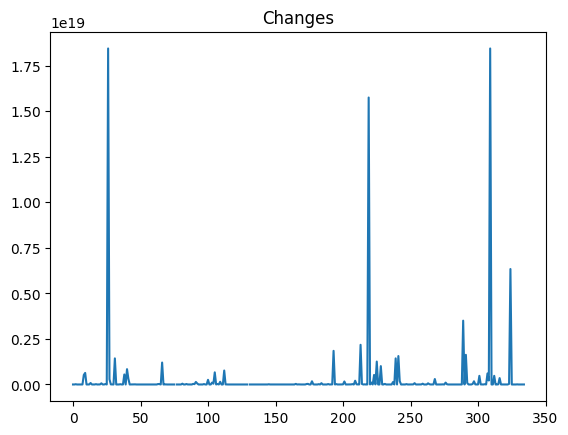

In [11]:
plt.plot(history_book['changes'])
plt.title("Changes")

Text(0.5, 1.0, 'Values')

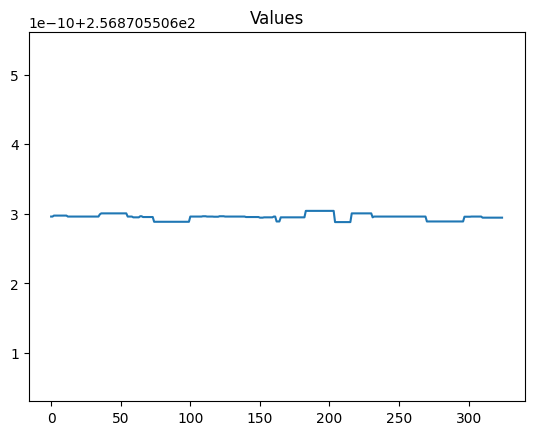

In [12]:
plt.plot(history_book['values'][10:])
plt.title("Values")

Text(0.5, 1.0, 'Temperature')

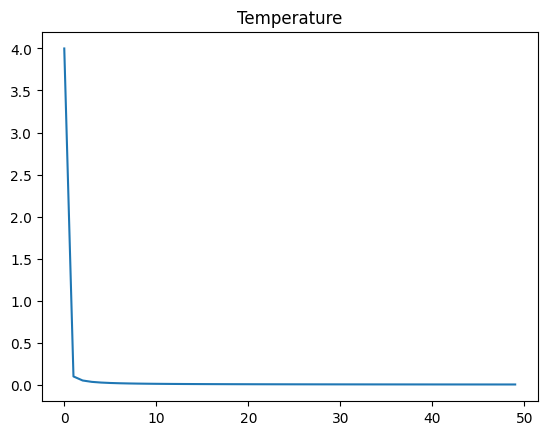

In [13]:
plt.plot(history_book['temperature'][:50])
plt.title("Temperature")